### Task 2.1
* Name:LI WAN
* Student Number:223718804
* E-mail:s223718804@deakin.edu.au
* Course:SIT720
---

In [1]:
# Q1 Read csv file and print the feature name with numbers of missing entries.
import pandas as pd
local_path = r'E:\2-学习\1-Deakin\24-T1\SIT720\Task\sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv'
df=pd.read_csv(local_path, comment='#')

# Print the feature names
print("Feature Names:")
print(df.columns.tolist())

# Count the number of missing entries in each feature
missing_counts = df.isnull().sum()

# Print the number of missing entries for each feature
print("\nNumber of Missing Entries for Each Feature:")
print(missing_counts)

# Print the number of rows
num_rows = df.shape[0]
print("Number of Rows:", num_rows)

Feature Names:
['timestamp', 'mac', 'boardtype', 'boardid', 'temp_max', 'temp_min', 'temp_avg', 'light_max', 'light_min', 'light_avg', 'humidity_min', 'humidity_max', 'humidity_avg', 'model', 'latitude', 'longitude', 'elevation', 'location', 'rowid', 'Position', 'geolocation']

Number of Missing Entries for Each Feature:
timestamp           0
mac                 0
boardtype           0
boardid             0
temp_max            0
temp_min            0
temp_avg            0
light_max           0
light_min           0
light_avg           0
humidity_min        0
humidity_max        0
humidity_avg        0
model               0
latitude            0
longitude           0
elevation       21595
location            0
rowid               0
Position        56570
geolocation         0
dtype: int64
Number of Rows: 56570


By calculating the missing entries, we can know evelation column have 21595 missing data of 56570 samples which means about 38.2% of data is missing.  If we want to fill in these missing data, we have to know the data distribution firstly. We can draw scatter plot and boxplot to see the general data fetures.  
Position column is blank. Therefore, we cannot know any information for this column. And it is impossbile to fill in that we can delete this column. 

Mean: 12.973809578270192
Median: 2.74


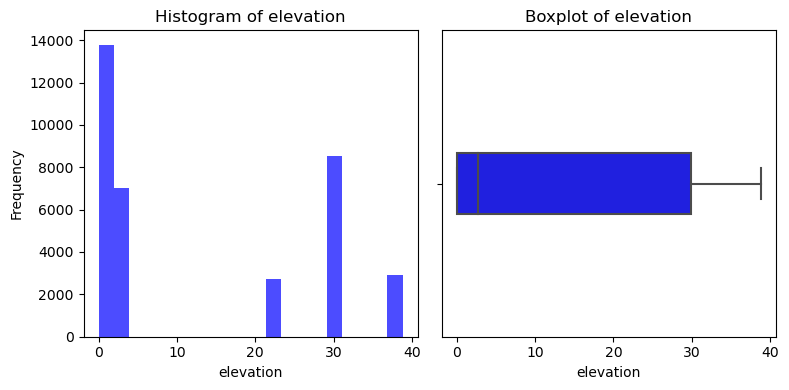

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean
mean_elevation = df['elevation'].mean()

# Calculate the median
median_elevation = df['elevation'].median()

print("Mean:", mean_elevation)
print("Median:", median_elevation)

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the histogram
axes[0].hist(df['elevation'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histogram of elevation')
axes[0].set_xlabel('elevation')
axes[0].set_ylabel('Frequency')

# Plot the boxplot
sns.boxplot(x='elevation', data=df, ax=axes[1], color='blue', width=0.2)
axes[1].set_title('Boxplot of elevation')
axes[1].set_xlabel('elevation')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

From histagram and boxplot graphs, we can see more data are located in 2.74 (Median), outliers are very large which are above 20 to make the average of elevation be 12.97. The gap is very obvious. If we want to fill in  21595 missing entires, no matter choosing median or mean, it will both change the data distribution significantly. Considering the samples are observations of natural climate, the gap between two nearest data should not be too large. It is better to use average of neareast non-missing values to replace the missing values. It may not always be the best choice, especially in cases where the data exhibit non-linear relationships or are sensitive to outliers.

In [157]:
# Q2 Fill in the missing entries with average of nearest non-missing values
df['elevation'] = df['elevation'].interpolate(method='linear')

# Verify the filled data 
print(df['elevation'].isnull().sum()) 

286


Modified Mean: 18.152140661644516
Modified Median: 23.804822922193082


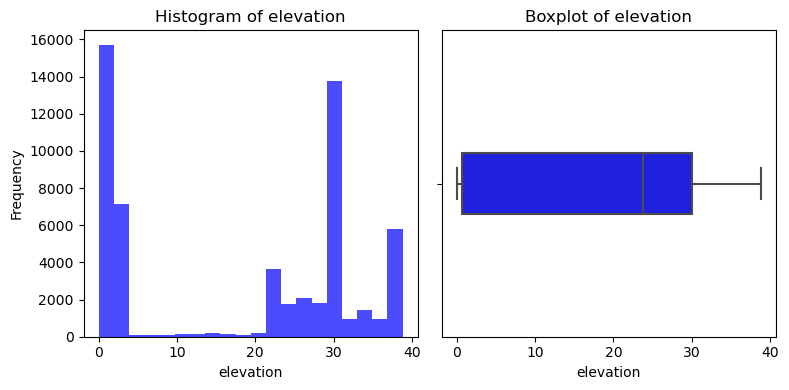

In [158]:
# Calculate the mean
mean_elevation = df['elevation'].mean()

# Calculate the median
median_elevation = df['elevation'].median()

print("Modified Mean:", mean_elevation)
print("Modified Median:", median_elevation)

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the histogram
axes[0].hist(df['elevation'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histogram of elevation')
axes[0].set_xlabel('elevation')
axes[0].set_ylabel('Frequency')

# Plot the boxplot
sns.boxplot(x='elevation', data=df, ax=axes[1], color='blue', width=0.2)
axes[1].set_title('Boxplot of elevation')
axes[1].set_xlabel('elevation')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

From the modified elevation data, we can see it does not have a clear normal distribution, so we choose the modified median to fill in the rest of the missing data which is 23.8.

In [159]:
# Fill remaining missing values with 23.8
df['elevation'] = df['elevation'].fillna(23.8)

# Verify the filled data 
print(df['elevation'].isnull().sum())

print("Modified Mean:", mean_elevation)
print("Modified Median:", median_elevation)

0
Modified Mean: 18.152140661644516
Modified Median: 23.804822922193082


In [160]:
# Q3 Encode the categorical variable location and save the modified columns to upload.

# From raw data, we know Location only have Docklands Library and Fitzroy Gardens.
# Initialize BinaryEncoder
encoder = BinaryEncoder(cols=['location'])

# Perform one-hot encoding for the 'location' column
df_encoded = pd.get_dummies(df[['elevation', 'location']], columns=['location'])

# Display the encoded values
print(df_encoded)

# Save the modified columns into a CSV file
df_encoded.to_csv('E:/2-学习/1-Deakin/24-T1/SIT720/Task/encoded_data.csv', index=False)

       elevation  location_Docklands Library  location_Fitzroy Gardens
0          23.80                        True                     False
1          23.80                        True                     False
2          23.80                        True                     False
3          23.80                        True                     False
4          23.80                        True                     False
...          ...                         ...                       ...
56565       3.75                        True                     False
56566       3.75                        True                     False
56567       3.75                        True                     False
56568       3.75                        True                     False
56569       3.75                        True                     False

[56570 rows x 3 columns]


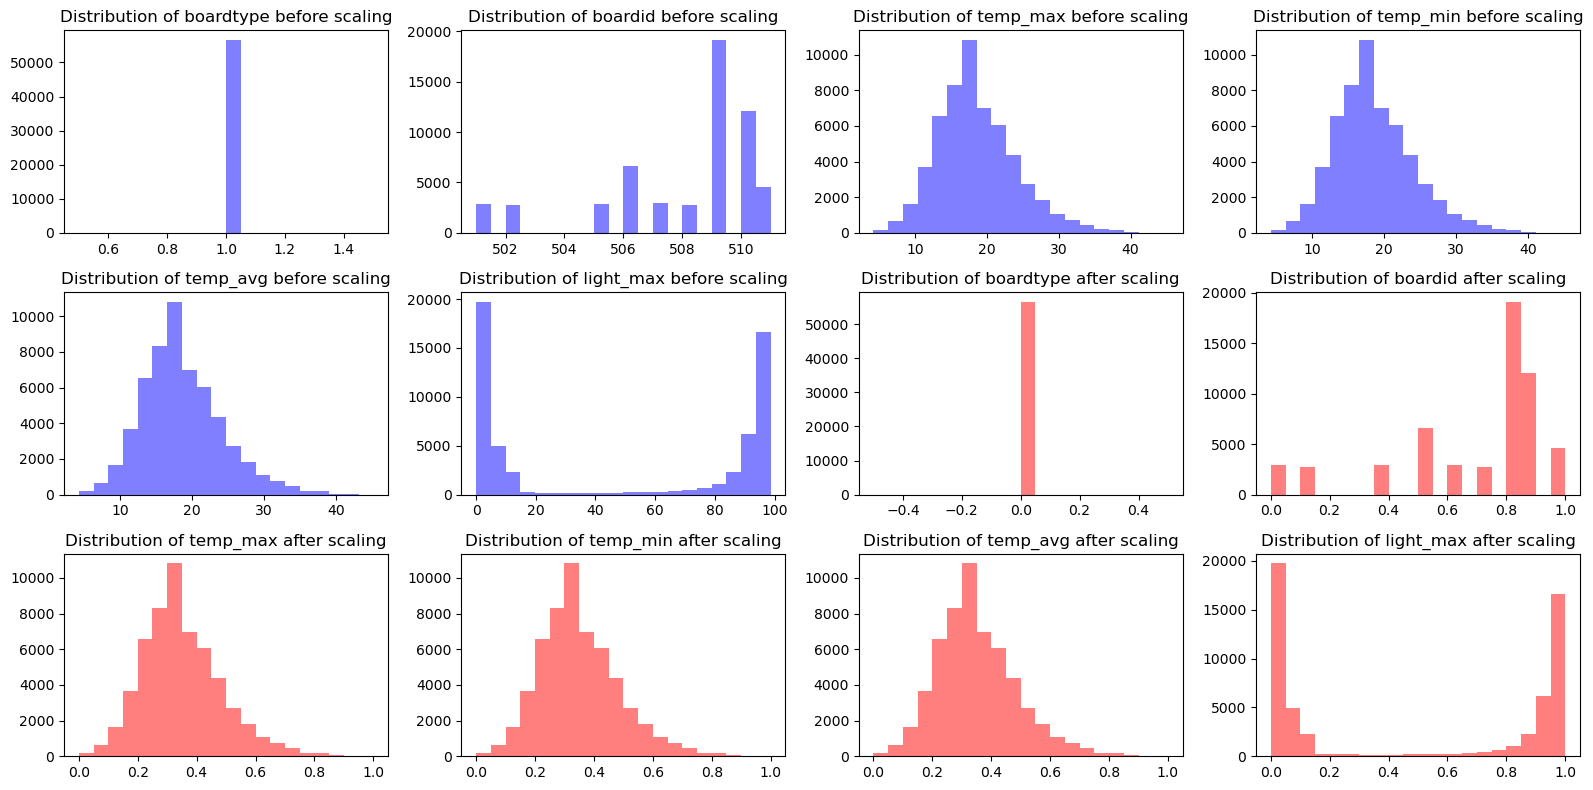

In [161]:
# Q4 Apply the min-max scaling on features
from sklearn.preprocessing import MinMaxScaler

# Select the features
features = ['boardtype', 'boardid', 'temp_max', 'temp_min', 'temp_avg', 
            'light_max', 'light_min', 'light_avg', 'humidity_min', 
            'humidity_max', 'humidity_avg']

# Apply min-max scaling
scaler = MinMaxScaler()
data_scaled = df.copy()
data_scaled[features] = scaler.fit_transform(data_scaled[features])

# Plot distributions before and after scaling
plt.figure(figsize=(16, 8))
for i, feature in enumerate(features[:6], start=1):
    plt.subplot(3, 4, i)
    plt.hist(df[feature], bins=20, color='blue', alpha=0.5)
    plt.title(f'Distribution of {feature} before scaling')

    plt.subplot(3, 4, i+6)
    plt.hist(data_scaled[feature], bins=20, color='red', alpha=0.5)
    plt.title(f'Distribution of {feature} after scaling')

plt.tight_layout()
plt.show()

MinMax method does not change the shape of the distribution of these features, but the range all became between -1 and 1. This normalization ensures that all features are on a similar scale, which is beneficial for machine learning algorithms, particularly those sensitive to feature magnitudes or distances. By scaling the features to a common range, MinMax scaling helps improve the performance and convergence of various machine learning algorithms, such as gradient descent-based optimization algorithms and distance-based algorithms like K-nearest neighbors (KNN).